In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [5]:
sno_df = pd.read_csv('data/Hoosier_pass_SNOTEL_1980-2021.csv')

In [13]:
sno_df['datetime'] = pd.to_datetime(sno_df['Date'])

In [16]:
sno_df.set_index('datetime', inplace=True)

In [17]:
sno_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14873 entries, 1980-07-31 to 2021-04-19
Data columns (total 7 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Date                                                 14873 non-null  object 
 1   Snow Water Equivalent (in) Start of Day Values       14873 non-null  float64
 2   Precipitation Accumulation (in) Start of Day Values  14853 non-null  float64
 3   Air Temperature Maximum (degF)                       12796 non-null  float64
 4   Air Temperature Minimum (degF)                       12770 non-null  float64
 5   Air Temperature Average (degF)                       12787 non-null  float64
 6   Precipitation Increment (in)                         14849 non-null  float64
dtypes: float64(6), object(1)
memory usage: 929.6+ KB


In [19]:
sno_df = sno_df['1990':'2021']

In [22]:
wdf_one = pd.read_csv('data/1_BLUABLCO_CFS_1990-2021.csv')

In [23]:
water_df_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11431 entries, 0 to 11430
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Abbrev                    11431 non-null  object 
 1   Meas Date                 11431 non-null  object 
 2   Streamflow Value          11431 non-null  float64
 3   Streamflow Meas Units     11431 non-null  object 
 4   Streamflow Review Status  11431 non-null  object 
 5   Streamflow Data Source    11431 non-null  object 
 6   Unnamed: 6                0 non-null      float64
dtypes: float64(2), object(5)
memory usage: 625.3+ KB


In [26]:
wdf_one.head()

,Abbrev,Meas Date,Streamflow Value,Streamflow Meas Units,Streamflow Review Status,Streamflow Data Source,Unnamed: 6
0,BLUABLCO,01/01/1990,6.5,cfs,A,USGS,NaN
1,BLUABLCO,01/02/1990,6.9,cfs,A,USGS,NaN
2,BLUABLCO,01/03/1990,6.9,cfs,A,USGS,NaN
3,BLUABLCO,01/04/1990,6.8,cfs,A,USGS,NaN
4,BLUABLCO,01/05/1990,7.3,cfs,A,USGS,NaN


In [28]:
wdf_one['Meas Date'] = pd.to_datetime(wdf_one['Meas Date'])

In [29]:
wdf_one.set_index('Meas Date', inplace=True)

In [30]:
wdf_one.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11431 entries, 1990-01-01 to 2021-04-18
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Abbrev                    11431 non-null  object 
 1   Streamflow Value          11431 non-null  float64
 2   Streamflow Meas Units     11431 non-null  object 
 3   Streamflow Review Status  11431 non-null  object 
 4   Streamflow Data Source    11431 non-null  object 
 5   Unnamed: 6                0 non-null      float64
dtypes: float64(2), object(4)
memory usage: 625.1+ KB


In [32]:
wdf_one = wdf_one['1990':'2021']

In [33]:
wdf_one.head()

,Abbrev,Streamflow Value,Streamflow Meas Units,Streamflow Review Status,Streamflow Data Source,Unnamed: 6
Meas Date,,,,,,
1990-01-01,BLUABLCO,6.5,cfs,A,USGS,NaN
1990-01-02,BLUABLCO,6.9,cfs,A,USGS,NaN
1990-01-03,BLUABLCO,6.9,cfs,A,USGS,NaN
1990-01-04,BLUABLCO,6.8,cfs,A,USGS,NaN
1990-01-05,BLUABLCO,7.3,cfs,A,USGS,NaN


In [34]:
sno_df.head()

,Date,Snow Water Equivalent (in) Start of Day Values,Precipitation Accumulation (in) Start of Day Values,Air Temperature Maximum (degF),Air Temperature Minimum (degF),Air Temperature Average (degF),Precipitation Increment (in)
datetime,,,,,,,
1990-01-01,1990-01-01,4.8,5.6,35.0,8.0,19.0,0.1
1990-01-02,1990-01-02,4.8,5.7,28.0,4.0,16.0,0.0
1990-01-03,1990-01-03,4.8,5.7,13.0,-9.0,2.0,0.0
1990-01-04,1990-01-04,4.8,5.7,11.0,-9.0,-2.0,0.0
1990-01-05,1990-01-05,4.8,5.7,12.0,-3.0,1.0,0.0


In [42]:
comb_df = pd.concat([sno_df, wdf_one], axis=1, join="inner")

In [43]:
comb_df.drop(['Date','Unnamed: 6'], axis=1, inplace=True)

In [44]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11431 entries, 1990-01-01 to 2021-04-18
Freq: D
Data columns (total 11 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Snow Water Equivalent (in) Start of Day Values       11431 non-null  float64
 1   Precipitation Accumulation (in) Start of Day Values  11431 non-null  float64
 2   Air Temperature Maximum (degF)                       11275 non-null  float64
 3   Air Temperature Minimum (degF)                       11249 non-null  float64
 4   Air Temperature Average (degF)                       11266 non-null  float64
 5   Precipitation Increment (in)                         11429 non-null  float64
 6   Abbrev                                               11431 non-null  object 
 7   Streamflow Value                                     11431 non-null  float64
 8   Streamflow Meas Units                    

In [45]:
comb_df.head()

,Snow Water Equivalent (in) Start of Day Values,Precipitation Accumulation (in) Start of Day Values,Air Temperature Maximum (degF),Air Temperature Minimum (degF),Air Temperature Average (degF),Precipitation Increment (in),Abbrev,Streamflow Value,Streamflow Meas Units,Streamflow Review Status,Streamflow Data Source
1990-01-01,4.8,5.6,35.0,8.0,19.0,0.1,BLUABLCO,6.5,cfs,A,USGS
1990-01-02,4.8,5.7,28.0,4.0,16.0,0.0,BLUABLCO,6.9,cfs,A,USGS
1990-01-03,4.8,5.7,13.0,-9.0,2.0,0.0,BLUABLCO,6.9,cfs,A,USGS
1990-01-04,4.8,5.7,11.0,-9.0,-2.0,0.0,BLUABLCO,6.8,cfs,A,USGS
1990-01-05,4.8,5.7,12.0,-3.0,1.0,0.0,BLUABLCO,7.3,cfs,A,USGS


In [46]:
comb_df.drop(['Abbrev', 'Streamflow Meas Units',], axis=1, inplace=True)

<AxesSubplot:>

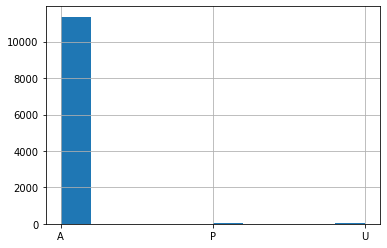

In [47]:
comb_df['Streamflow Review Status'].hist()

In [48]:
comb_df.drop('Streamflow Review Status', axis=1, inplace=True)

In [49]:
df = comb_df.copy()

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11431 entries, 1990-01-01 to 2021-04-18
Freq: D
Data columns (total 8 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Snow Water Equivalent (in) Start of Day Values       11431 non-null  float64
 1   Precipitation Accumulation (in) Start of Day Values  11431 non-null  float64
 2   Air Temperature Maximum (degF)                       11275 non-null  float64
 3   Air Temperature Minimum (degF)                       11249 non-null  float64
 4   Air Temperature Average (degF)                       11266 non-null  float64
 5   Precipitation Increment (in)                         11429 non-null  float64
 6   Streamflow Value                                     11431 non-null  float64
 7   Streamflow Data Source                               11431 non-null  object 
dtypes: float64(7), object(1)
memory usage: 803

In [65]:
df.drop('Streamflow Data Source', axis=1, inplace=True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11431 entries, 1990-01-01 to 2021-04-18
Freq: D
Data columns (total 7 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Snow Water Equivalent (in) Start of Day Values       11431 non-null  float64
 1   Precipitation Accumulation (in) Start of Day Values  11431 non-null  float64
 2   Air Temperature Maximum (degF)                       11275 non-null  float64
 3   Air Temperature Minimum (degF)                       11249 non-null  float64
 4   Air Temperature Average (degF)                       11266 non-null  float64
 5   Precipitation Increment (in)                         11429 non-null  float64
 6   Streamflow Value                                     11431 non-null  float64
dtypes: float64(7)
memory usage: 714.4 KB


In [82]:
df['Streamflow Value'].unique()

array([6.5 , 6.9 , 6.8 , ..., 8.41, 8.78, 8.75])

<Figure size 1440x1440 with 0 Axes>

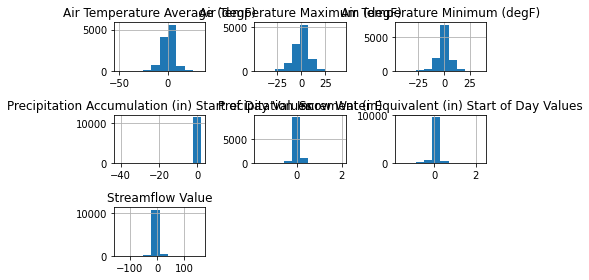

In [88]:
plt.figure(figsize=(20,20))
df.diff().hist()
plt.tight_layout()

<AxesSubplot:xlabel='Precipitation Accumulation (in) Start of Day Values'>

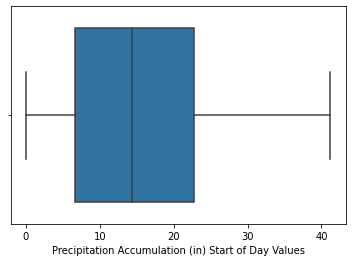

In [99]:
sns.boxplot(df.iloc[:,1])